In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr
from scipy import stats

import keila_wrangle as w
import keila_explore as e
import chelly_evaluation as ce

# Project Description
We will be analyzing, factors that affect wine quality. Our objective is to build a predictive model that can estimate the quality of a given wine. The focus here is to gain insights and understanding about the factors influencing wine quality rather than generating practical predictions.

# Project Goal

* We will be analyzing, exploring the different attributes affecting red and white wine quality. 
* We will be creating a model based on to predict the quality of the wine.
* This data would not be used on future properties or for real life prediction.

# Initial Thoughts

The initial hypothesis for this project is that certain factors such as 'alcohol', 'chlorides', 'ph', 'residual sugar', 'density' may be significant drivers of wine quality.


# Acquire
* Aquire dataset from [Data.World: Wine Quality](https://data.world/food/wine-quality)
* It contains two datasets: winequality-red.csv (1599 rows × 12 columns) & winequality-white.csv (4898 rows × 12 columns) 
* Each row represents a unique wine
* Each column represents a feature of those wines.

# Prepare
- Prepare Actions:
    * Fixed columns names to promote readability
    * Checked for nulls in the data. No nulls were found.
    * Checked that column data types were appropriate
    * Added wine_type column, which identifies if the wine is red or white
    * Added quality_type column, which identifies if the wine is low <= 5 quality or high > 5 quality
    * Encoded categorical variables
    * Split data into train, validate and test (approx. 60/20/20)
    * 578 outliers have been removed for the iteration of the project, based on if they fell outside the 4 standard deviation

In [2]:
# acquire, prep, and clean data
train, validate, test = w.clean_wine()
# categorize quality into high low 
# train_qt['quality_type'] = train['quality'].replace({3: 'low', 4: 'low', 5: 'low', 6: 'high', 7: 'high', 8: 'high', 9: 'high'})
# # categorize quality into high low 

# Summarize df

In [3]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine,wine_type
1961,9.5,0.21,0.47,1.3,0.039,21.0,123.0,0.99590,2.90,0.64,9.5,5,0,white
3624,6.6,0.36,0.28,6.1,0.029,12.0,93.0,0.99054,3.19,0.27,12.8,7,0,white
216,7.5,0.27,0.36,7.0,0.036,45.0,164.0,0.99390,3.03,0.33,11.0,5,0,white
657,7.3,0.34,0.21,3.2,0.050,14.0,136.0,0.99360,3.25,0.44,10.2,5,0,white
1571,7.4,0.30,0.49,8.2,0.055,49.0,188.0,0.99740,3.52,0.58,9.7,6,0,white


# Explore

## Does Low Quality Wine Contain More Alcohol? 

$H_o$: The average alcohol amount for high quality wine is less than or equal to the average alcohol amount for low quality wines
    
$H_a$: The average alcohol amount for high quality wine is greater than or equal to the average alcohol amount for low quality wines

**I will use an Independent T-Test (1-tailed), to investigate whether low quality wines have more or less alcohol**

* I will use a confidence interval of 95%
* The alpha is .05

ValueError: Could not interpret input 'quality_type'

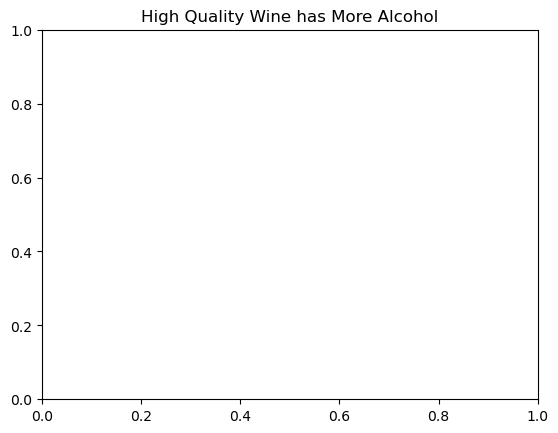

In [4]:
e.alcohol_barplot(train)

Observations: 
* High quality white and red wines have slightly more alcohol content than low quality wine.
* The higher quality white wine has less sugar then the low quality white wine

In [ ]:
# create samples
low_quality_alcohol = train[train.quality_type == 'low'].alcohol
high_quality_alcohol = train[train.quality_type == 'high'].alcohol
# check variances -- equal
stats.levene(low_quality_alcohol, high_quality_alcohol)
# run T-Test
e.ind_var_test(high_quality_alcohol, low_quality_alcohol)

**We reject the null hypothesis, therfore, we have evidence to support that the average amount of alcohol in high quality wine is more than the average amount of alcohol in low quality wine. Based on this, I believe that using the 'alcohol' feature in modeling will have a small positive impact on the model's accuracy.**

## Does Residual Sugar Affect Wine Quality?
$H_o$: The average residual sugar for low quality wine is less than or equal to the average residual sugar for high quality wines

$H_a$: The average residual sugar for low quality wine is greater than the average residual sugar for high quality wines

**I will use an Independent T-Test (1-tailed), to investigate whether low quality wines have more or less residual suger**

* I will use a confidence interval of 95%
* The alpha is .05

In [ ]:
e.sugar_barplot(train)

Observations: 
* On average white wines have more sugar than red wines.
* The higher quality white wine has less sugar then the low quality white wine
* The red wines appear to have the same residual sugar content regardless of quality

In [ ]:
# create samples
low_quality_sugar = train[train.quality_type == 'low'].residual_sugar 
high_quality_sugar = train[train.quality_type == 'high'].residual_sugar
# check variances -- equal
stats.levene(low_quality_sugar,high_quality_sugar)
# run T-Test
e.ind_var_test(low_quality_sugar,high_quality_sugar)

**We rejected the null hypothesis, therfore, we have evidence to support that the average amount of residual sugar in low quality wine is greater than the average amount of residual sugar in high quality wine. Based on this, I believe that using the 'residual_sugar' feature in modeling will have a small positive impact on the model's accuracy.**

## Does Chlorides Affect Wine Quality?
$H_o$: The average chlorides for low quality wine is less than or equal to the average chorides for high quality wines

$H_a$: The average chlorides for low quality wine is greater than the average chlorides for high quality wines

**I will use an Independent T-Test (1-tailed), to investigate whether low quality wines have more or less chlorides**

* I will use a confidence interval of 95%
* The alpha is .05

In [ ]:
e.chlorides_barplot(train)

Observations: 
* The low quality wines have more chlorides when visually compared to the high quality wines.
* The red wines have mores chlorides when compared to white wine regardless of quality.

In [ ]:
# create samples
low_quality_chlorides = train[train.quality_type == 'low'].chlorides 
high_quality_chlorides= train[train.quality_type == 'high'].chlorides
# check variances -- equal
stats.levene(low_quality_chlorides,high_quality_chlorides)
# run T-Test
e.ind_var_test(low_quality_chlorides,high_quality_chlorides)

**We rejected the null hypothesis, therfore, we have evidence to support that the average amount of chlorides in low quality wine is greater than the average amount of chlorides in high quality wine. Based on this, I believe that using the 'chlorides' feature in modeling will have a small positive impact on the model's accuracy.**

## Does Total Sulfur Dioxide Affect Wine Quality?

$H_o$: The average total sulfur dioxide for low quality wine is less than or equal to the average total sulfur dioxide for high quality wines

$H_a$: The average total sulfur dioxide for low quality wine is greater than the average total sulfur dioxide for high quality wines

**I will use an Independent T-Test (1-tailed), to investigate whether low quality wines have more or less total sulfur dioxide**

* I will use a confidence interval of 95%
* The alpha is .05

In [ ]:
def tsd_barplot(df):
    '''
    This function creates a custom bar chart for comparing low/high quality wine's total sulfur dioxide content
    '''
    fig, ax =plt.subplots()
    
    # set color palette
    sns.set_palette("pastel")
    
    # create average line    
    plt.title("Higher Quality Wine has Less Total Sulfur Dioxide")
    sns.barplot(x="quality_type", y="total_sulfur_dioxide", data=df, hue='wine_type')
    plt.xlabel("Quality")
    plt.ylabel("Total Sulfur Dioxide")
    tick_label = ["Low", "High"]
    ax.set_xticklabels(tick_label)
    total_sulfur_dioxide = df.total_sulfur_dioxide.mean()
    plt.axhline(total_sulfur_dioxide, label="Total Sulfur Dioxide Average", color='DarkSlateBlue')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
e.tsd_barplot(train)

In [ ]:
# create samples
low_quality_tsd = train[train.quality_type == 'low'].total_sulfur_dioxide 
high_quality_tsd = train[train.quality_type == 'high'].total_sulfur_dioxide
# check variances -- equal
stats.levene(low_quality_tsd,high_quality_tsd)
# run T-Test
e.ind_var_test(low_quality_tsd,high_quality_tsd)

**We rejected the null hypothesis, therfore, we have evidence to support that the average amount of total sulfur dioxide in low quality wine is greater than the average amount of total sulfur dioxide in high quality wine. Based on this, I believe that using the 'total_sulfur_dioxide' feature in modeling will have a small positive impact on the model's accuracy.**

## Does Citric Acid Affect Red Wine Quality?

$H_o$: The average citric acid in red wine for low quality wine is less than or equal to the average citric acid in red wine for high quality wines

$H_a$: The average citric acid in red wine for low quality wine is greater than the average citric acid in red wine for high quality wines

**I will use an Independent T-Test (1-tailed), to investigate whether red low quality wines have more or less citric acid**

* I will use a confidence interval of 95%
* The alpha is .05

In [ ]:
def citric_barplot(df):
    '''
    This function creates a custom bar chart for comparing red wine's citric acid in quality
    '''
    fig, ax =plt.subplots()
    # creat average line
  
    
    plt.title("Higher Quality Wine has More Citric Acid ")
    sns.barplot(x="quality_type", y="citric_acid", data=df, hue="red_wine")
    plt.xlabel("Quality")
    plt.ylabel("Amount of Citric Acid")
    tick_label = ["Low", "High"]
    ax.set_xticklabels(tick_label)
    citric_acid_average = df.citric_acid.mean()
    plt.axhline(citric_acid_average, label="Citric Acid Average", color='DarkSlateBlue')
    plt.legend()
    plt.show()

In [ ]:
red_train = train[train.red_wine == 1]

In [ ]:
citric_barplot(red_train)

observation:
    * red wine with more citric acid is higher quality
    * white wine doesn't differ much in quality and has more red wine 

null h: That high quality red wine is less than or equal to citric acid  compared to low quality red wine
     That high quality red wine has greater than to citric acid  compared to low quality red wine

In [ ]:
#Adding high_citric column to the train, validate, test data frames for further use in modeling
# train,validate,test=ce.high_citric_col(train, validate, test)

In [ ]:
train

# Clustering

- Features that would be used during clustering would be: residual sugar, alcohol, chlorides.

In [5]:
train, validate, test = w.clean_wine()

In [122]:
# dropping the target variable columns to create our features variables
target = 'quality'

train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = w.split_data_xy(train, validate, test, target)

train -> (3551, 14)
validate -> (1184, 14)
test -> (1184, 14)


In [123]:
# functions scales the x_train,x_validate,x_test data usinf MinMax Scaler

x_train_scaled,x_validate_scaled,x_test_scaled=w.mm_scale(x_train,x_validate,x_test)

In [124]:
#Choosing the features that would be used for our clustering test
train_cluster=x_train_scaled[['residual_sugar','alcohol','chlorides']]
val_cluster=x_validate_scaled[['residual_sugar','alcohol','chlorides']]
test_cluster=x_test_scaled[['residual_sugar','alcohol','chlorides']]

In [125]:
# calculating the KMeans on all  data sets to use for modeling
train_cluster=ce.calculate_kmeans(train_cluster,3)
val_cluster=ce.calculate_kmeans(val_cluster,3)
test_cluster=ce.calculate_kmeans(test_cluster,3)


## Insight:

### During clustering we have confirm there is a small correlation between residual_sugar, alcohol and the level of chlorides. 

- Cluster 0= Wine with a low alcohol, and low residual sugar have a high concentration of chlorides
- Cluster 1= Wines with a high level of alcohol, low residual sugar, have a low concentration of chlorides.
- Cluster 2= Wines with high residual sugar an dlow level of alcohol, have a medium level concentration of chlorides.

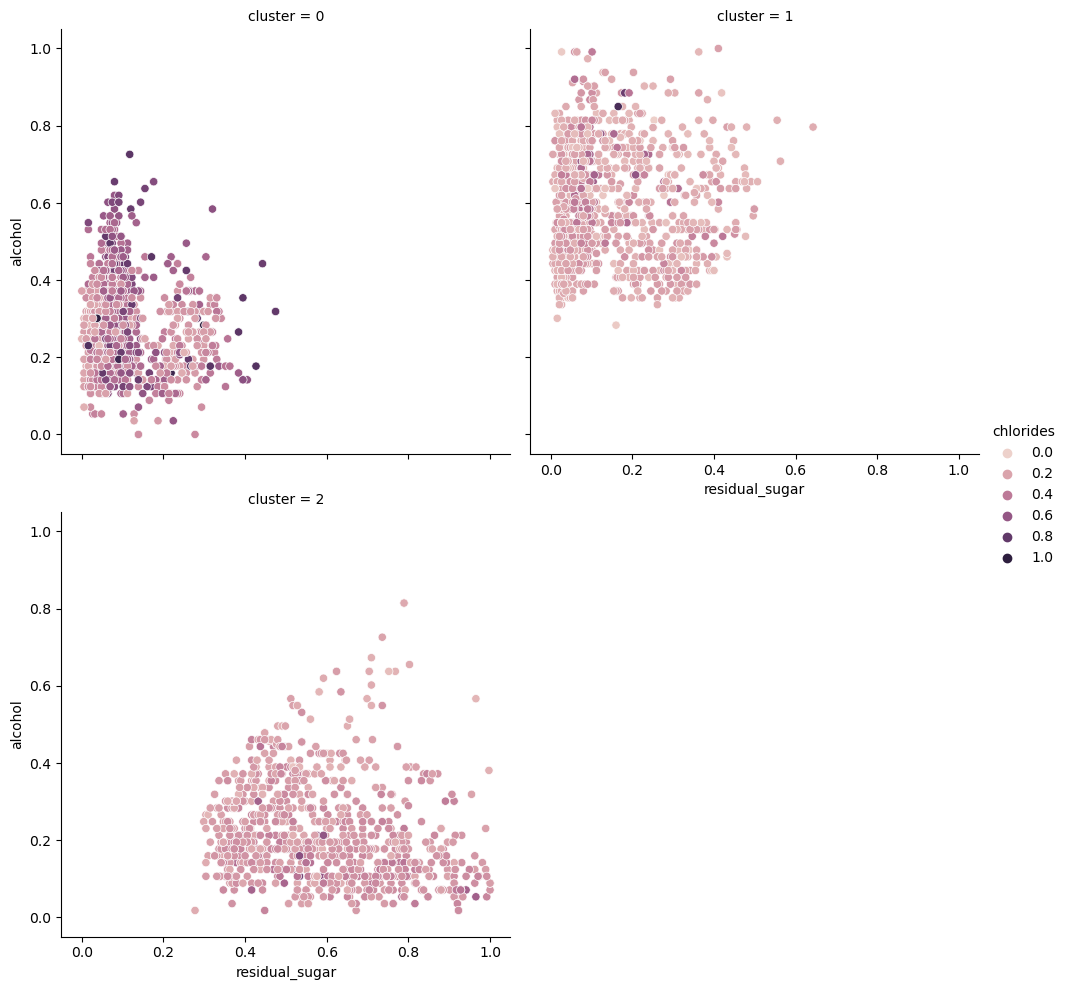

In [126]:
sns.relplot(data=train_cluster,
           x='residual_sugar',
           y='alcohol',
           hue='chlorides',
           col='cluster',
           col_wrap=2)
plt.show()

### Conclusion: We would be using our cluster during the modeling process to see if this would help improved the accuracy of the prediction of wine quality.

# Modeling

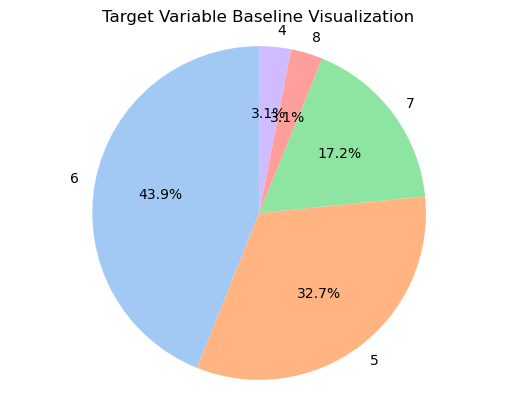

In [127]:
#Baseline visualization:
ce.create_pie_chart(train,'quality',"Target Variable Baseline Visualization")

In [128]:
def add_cluster_col(scaled_df, cluster_cols):    
    cluster_col = pd.DataFrame(cluster_cols.iloc[:, -1])
    cluster_col = pd.get_dummies(cluster_col['cluster'],prefix='cluster', drop_first=True)
    new_df = pd.concat([scaled_df, cluster_col], axis=1)
    return new_df

In [129]:
cluster_col = pd.DataFrame(train_cluster.iloc[:, -1])
pd.get_dummies(cluster_col['cluster'],prefix='cluster', drop_first=True)
# new_df = pd.concat([x_train_scaled, cluster_col], axis=1)
# new_df


,cluster_1,cluster_2
0,0,0
1,1,0
2,1,0
3,0,0
4,0,1
...,...,...
3546,0,1
3547,0,0
3548,1,0
3549,1,0


In [130]:
# Adding the cluster column to the dataframe to use for modeling
x_train_cluster=add_cluster_col(x_train_scaled, train_cluster)
x_validate_cluster=add_cluster_col(x_validate_scaled, val_cluster)
x_test_cluster =add_cluster_col(x_test_scaled, test_cluster)
# y_train=train.quality
# y_validate=validate.quality
# y_test=test.quality

In [132]:
y_train

1961    5
3624    7
216     5
657     5
1571    6
       ..
1125    6
994     6
3813    5
4429    6
3234    6
Name: quality, Length: 3551, dtype: int64

In [149]:
# Selecting the features for modeling purposes
features = ['cluster_1', 'volatile_acidity', 'free_sulfur_dioxide', 'chlorides']
x_train=x_train_cluster[features]
x_validate=x_validate_cluster[features]
x_test=x_test_cluster[features]


In [150]:
x_train

,cluster_1,volatile_acidity,free_sulfur_dioxide,chlorides
0,0,0.173333,0.243902,0.200000
1,1,0.373333,0.134146,0.125926
2,1,0.253333,0.536585,0.177778
3,0,0.346667,0.158537,0.281481
4,0,0.293333,0.585366,0.318519
...,...,...,...,...
3546,0,0.626667,0.390244,0.259259
3547,0,0.133333,0.280488,0.207407
3548,1,0.293333,0.243902,0.222222
3549,1,0.306667,0.713415,0.222222


In [151]:
ce.run_decision_tree(x_train,x_validate,y_train,y_validate,10)

0.41385135135135137

In [152]:
ce.run_knn(x_train,x_validate,y_train,y_validate,6)

0.4206081081081081

In [153]:
ce.run_knn(x_train,x_validate,y_train,y_validate,7)

0.4172297297297297

## Conclusion
- Utilizing the clusters did not increase or improved our predictions. Modeling results were below baseline of 64.3%

In [154]:
features = ['alcohol','residual_sugar','total_sulfur_dioxide','chlorides','volatile_acidity']
x_train_feat2=x_train_cluster[features]
x_validate_feat2=x_validate_cluster[features]
x_test_feat2=x_test_cluster[features]


In [155]:
x_test_feat2

,alcohol,residual_sugar,total_sulfur_dioxide,chlorides,volatile_acidity
0,0.300885,0.069333,0.047970,0.474074,0.820000
1,0.814159,0.016000,0.236162,0.148148,0.146667
2,0.300885,0.138667,0.228782,0.207407,0.060000
3,0.141593,0.085333,0.225092,0.555556,0.946667
4,0.141593,0.037333,0.206642,0.437037,0.720000
...,...,...,...,...,...
1179,0.637168,0.048000,0.402214,0.192593,0.160000
1180,0.318584,0.309333,0.343173,0.237037,0.160000
1181,0.424779,0.154667,0.464945,0.170370,0.253333
1182,0.601770,0.085333,0.044280,0.466667,0.320000


In [156]:
ce.fit_DT_random_features(x_train_feat2,y_train)

(DecisionTreeClassifier(max_depth=11),
                                   Model     Score
 0  DecisionTreeClassifier(max_depth=11)  0.774993
 1  DecisionTreeClassifier(max_depth=10)  0.735567
 2   DecisionTreeClassifier(max_depth=9)  0.703182)

In [157]:
ce.fit_KNN_random_features(x_train_feat2,y_train)

(KNeighborsClassifier(n_neighbors=2),
                                  Model     Score
 0  KNeighborsClassifier(n_neighbors=2)  0.795551
 1  KNeighborsClassifier(n_neighbors=3)  0.744861
 2  KNeighborsClassifier(n_neighbors=4)  0.709941
 3               KNeighborsClassifier()  0.681498)

## The model that would be used for our test data set would be: Decision Tree Classifier with a max_depth of 6

In [158]:
ce.run_decision_tree(x_train_feat2,x_validate_feat2,y_train,y_validate,6)

0.5464527027027027

In [159]:
ce.run_decision_tree(x_train_feat2,x_test_feat2,y_train,y_test,6)

0.5371621621621622

## Conclusion:
- Our model performed ~ 10% above baseline of 64.3% on our train, validate, and test data sets.

# Summary:

- High qualit wines have slightly more alcohol content than low quality wine.
- The higher quality white wine has less sugar then the low quality white wine

# Key findings, recommendations, and takeaways